# Pandas

## Część I

Będziemy przetwarzać dane z Kaggle odnośnie imion dzieci w USA.

Krok 0: wczytaj pandas

In [1]:
import pandas as pd

Krok 1: wczytaj dane z pliku `US_Baby_Names_right.csv` z katalogu `lab12_files`

In [2]:
df = pd.read_csv('lab12_files/US_Baby_Names_right.csv')


Krok 2: przypisz dane do zmiennej `baby_names`. Zobacz jakiego typu dane są przechowywane i ile jest rekordów

In [3]:
baby_names = df
print(type(baby_names))
print(baby_names.shape)

<class 'pandas.core.frame.DataFrame'>
(1016395, 7)


Krok 3: podejrzy pierwszych 10 rekordów ze zbioru

In [4]:
print(baby_names.head(10))


   Unnamed: 0     Id      Name  Year Gender State  Count
0       11349  11350      Emma  2004      F    AK     62
1       11350  11351   Madison  2004      F    AK     48
2       11351  11352    Hannah  2004      F    AK     46
3       11352  11353     Grace  2004      F    AK     44
4       11353  11354     Emily  2004      F    AK     41
5       11354  11355   Abigail  2004      F    AK     37
6       11355  11356    Olivia  2004      F    AK     33
7       11356  11357  Isabella  2004      F    AK     30
8       11357  11358    Alyssa  2004      F    AK     29
9       11358  11359    Sophia  2004      F    AK     28


Krok 4: usuń kolumny 'Unnamed: 0' oraz 'Id' 

In [11]:
baby_names.drop(columns=['Unnamed: 0', 'Id'], inplace=True)
print(baby_names.head(10))
print(len(baby_names))



       Name  Year Gender State  Count
0      Emma  2004      F    AK     62
1   Madison  2004      F    AK     48
2    Hannah  2004      F    AK     46
3     Grace  2004      F    AK     44
4     Emily  2004      F    AK     41
5   Abigail  2004      F    AK     37
6    Olivia  2004      F    AK     33
7  Isabella  2004      F    AK     30
8    Alyssa  2004      F    AK     29
9    Sophia  2004      F    AK     28
1016395


Krok 5: czy w zbiorze jest więcej imion kobiet, czy mężczyzn?

In [12]:
counts = baby_names['Gender'].value_counts()
print(counts)


Gender
F    558846
M    457549
Name: count, dtype: int64


Krok 6: zgrupuj wiersze względem imion i wypisz 10 najczęściej pojawiających się imion.

In [13]:
top_overall = baby_names.groupby(['Name', 'Gender'])['Count'].sum().sort_values(ascending=False)
top_male_names = top_overall.xs('M', level='Gender').head(10)
top_female_names = top_overall.xs('F', level='Gender').head(10)
top_names_overall = top_overall.head(10)

Krok 7: wyniki z Kroku 6 zaprezentuj na wykresie korzystając z `matplotlib`. Przygotuj trzy wykresy, tj. 10 najczęsciej występujących imion: ogółem, u mężczyzn i u kobiet.

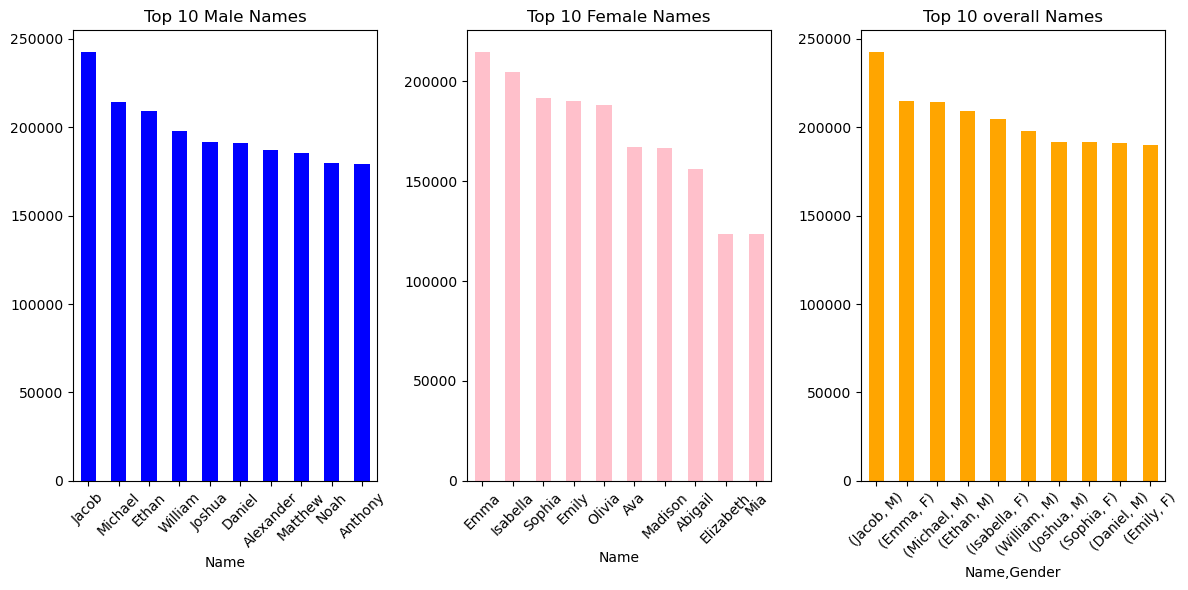

In [14]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 6))

top_male_names.plot.bar(x='Name', y='Count', ax=axes[0], color='blue', title='Top 10 Male Names', rot=45)

top_female_names.plot.bar(x='Name', y='Count', ax=axes[1], color='pink', title='Top 10 Female Names', rot=45)

top_names_overall.plot.bar(x='Name', y='Count', ax=axes[2], color='orange', title='Top 10 overall Names', rot=45)

plt.tight_layout()
plt.show()


Krok 8: Jak wiele różnych imion występuje w zbiorze?

In [15]:
name_counts = baby_names.groupby('Name')['Count'].sum()
total_diff_names = len(name_counts)
print(total_diff_names)

17632


Krok 9: Przygotuj generator imion, losujący je zgodnie z rozkłądem prawdopodobieństwa otrzymanym na podstawie przetwarzanego pliku

In [16]:
import numpy as np
import random
name_probs = name_counts / name_counts.sum()

def generate_random_name():
    #rand_i = random.randint(0,len(baby_names)+1)
    #return baby_names['Name'].iloc[rand_i]
    return np.random.choice(name_probs.index, p=name_probs.values)

random_name = generate_random_name()
print(random_name)

Jaydan


Krok 10: 
- Jakie imie występuje najczęściej?
- Wyznacz średnią, medianę i odchylenie stanadrdowe wystepowania imion.

In [18]:
top_name = baby_names.groupby(['Name'])['Count'].sum().sort_values(ascending=False).head(1)

print(top_name.index[0])
print(baby_names['Count'].mean())
print(baby_names['Count'].median())
print(baby_names['Count'].std())


Jacob
34.85012421351935
11.0
97.39734648625934


## Część II

Krok 1: Wczytaj dane

In [25]:
import pandas as pd
occupation = pd.read_csv('lab12_files/ocupation.csv',delimiter='|')


Krok 2: Podejrzyj pierwsze 25 rekordów

In [26]:
occupation.head(25)

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
5,6,42,M,executive,98101
6,7,57,M,administrator,91344
7,8,36,M,administrator,05201
8,9,29,M,student,01002
9,10,53,M,lawyer,90703


Krok 3: Podejrzyj ostatnie 10 rekordów

In [24]:
occupation.tail(10)


,user_id|age|gender|occupation|zip_code
933,934|61|M|engineer|22902
934,935|42|M|doctor|66221
935,936|24|M|other|32789
936,937|48|M|educator|98072
937,938|38|F|technician|55038
938,939|26|F|student|33319
939,940|32|M|administrator|02215
940,941|20|M|student|97229
941,942|48|F|librarian|78209
942,943|22|M|student|77841


Krok 4: Ile jest obserwacji w zbiorze? Ile jest kolumn w zbiorze?

In [27]:
num_observations, num_columns = occupation.shape

print("Number of observations:", num_observations)
print("Number of columns:", num_columns)

Number of observations: 943
Number of columns: 5


Krok 5: Wypisz nazwy kolumn

In [31]:
print(occupation.columns.values)

['user_id' 'age' 'gender' 'occupation' 'zip_code']


Krok 6: Ile różnych zawodów jest w zbiorze?

In [34]:
grouped = occupation.groupby('occupation')
print(len(grouped))

21


Krok 7: Przygotuj efektywny wykres na którym przedstawisz procetowy udział poszczególnych zawodów w zbiorze na charplocie
Wykorzystaj https://matplotlib.org/examples/pie_and_polar_charts/pie_demo_features.html

Przygotuj dwa wykresy: 
- jeden z wszystkimi zawodami
- drugi z 10 najcześtrzymi zawodami, pozostałem zawody trafiają do kategorii `Inne`

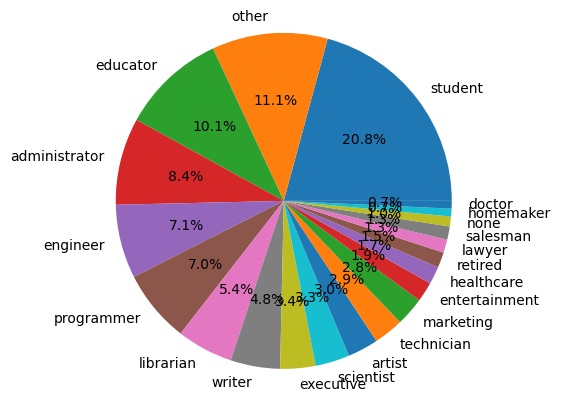

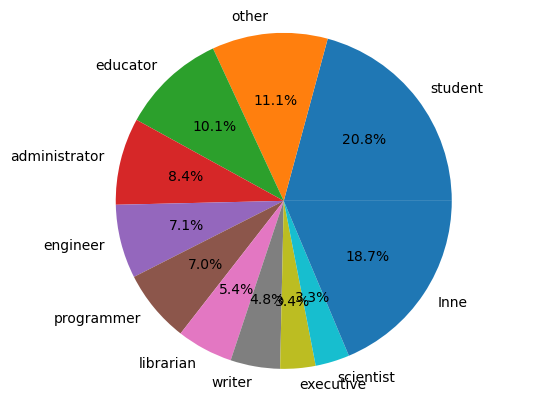

In [51]:
occupation_distribution = occupation['occupation'].value_counts()
fig1, ax1 = plt.subplots()
ax1.pie(occupation_distribution, labels=occupation_distribution.index,autopct='%1.1f%%')
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

top_10_occupations = occupation_distribution.head(10)
others_count = occupation_distribution[10:].sum()
others_series = pd.Series({'Inne': others_count})
top_10_with_others = pd.concat([top_10_occupations, others_series])

fig1, ax1 = plt.subplots()
ax1.pie(top_10_with_others, labels=top_10_with_others.index,autopct='%1.1f%%')
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

Krok 8: Przygotuj efektywny wykres na którym przedstawisz 10 najczęstrzych zawodów oraz ile pracuje w nich kobiet a ilu meżczyzn
Wykorzystaj https://matplotlib.org/gallery/api/barchart.html#sphx-glr-gallery-api-barchart-py

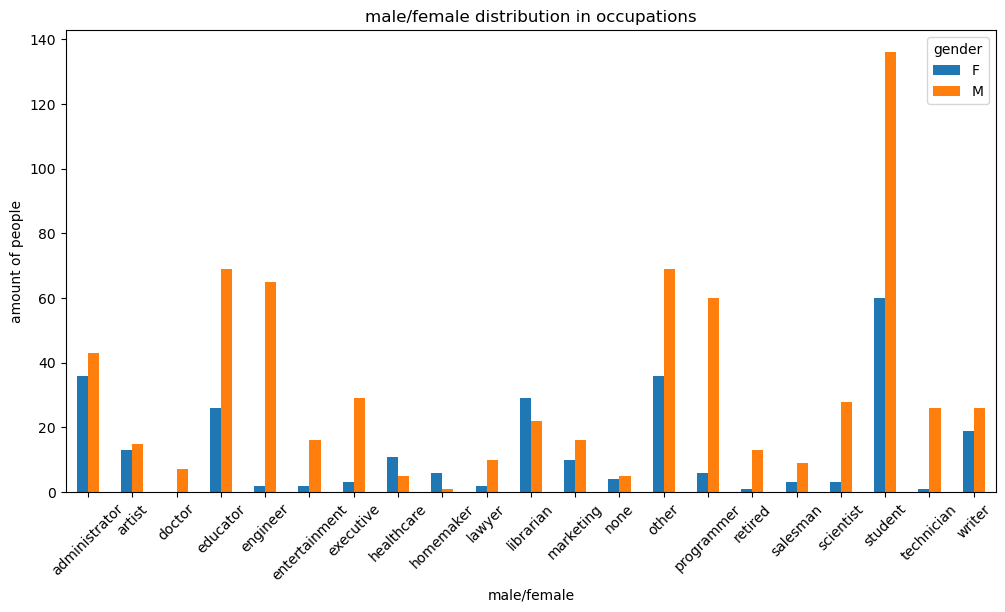

In [82]:
occupation_male_female_distribution = occupation.groupby(['occupation', 'gender']).size().unstack(fill_value=0)
occupation_male_female_distribution.plot(kind='bar', figsize=(12, 6))
plt.xlabel('male/female')
plt.ylabel('amount of people')
plt.title('male/female distribution in occupations')
plt.xticks(rotation=45)
plt.show()


Krok 9: Przygotuj efektywny wykres na którym przedstawisz średni wiek pracowników danego zawodu

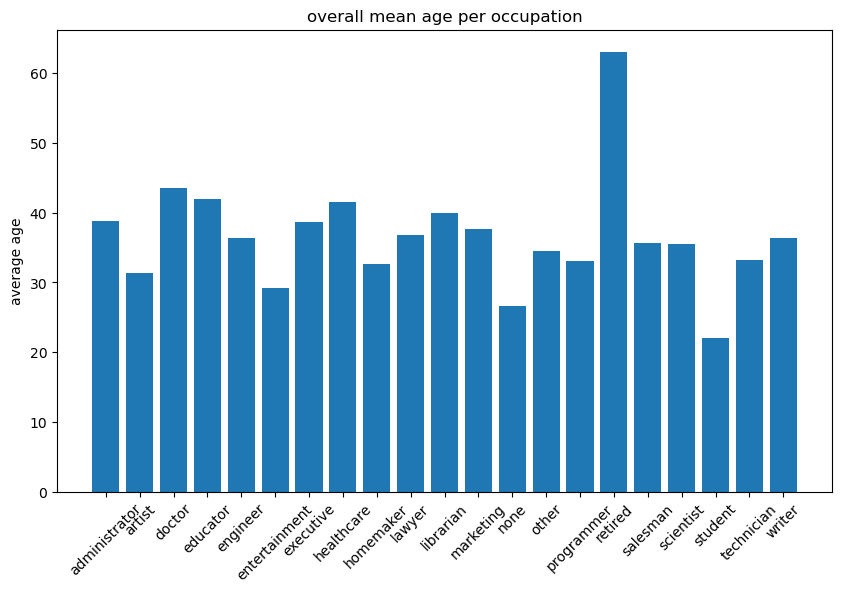

In [74]:
occupation_age_mean = occupation.groupby(['occupation'])['age'].mean()
plt.figure(figsize=(10,6))
plt.bar(occupation_age_mean.index, occupation_age_mean.values)
plt.xticks(rotation=45)
plt.ylabel('average age')
plt.title("overall mean age per occupation")
plt.show()

Krok 10: Przygotuj efektywny wykres na którym przedstawisz średni wiek kobiet i mężczyzn wykonujących dany zawód.

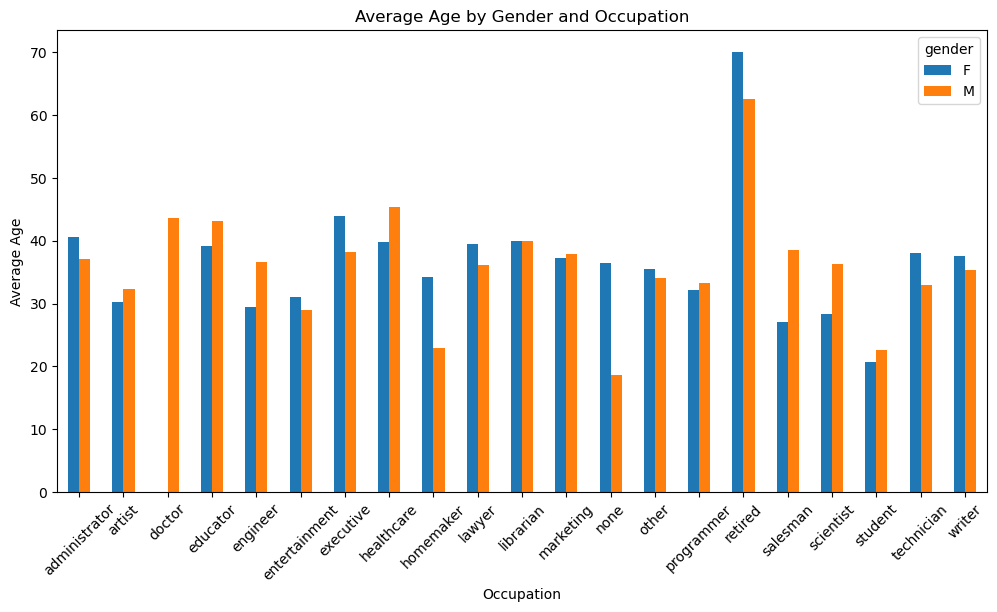

In [67]:
occupation_age_mean = occupation.groupby(['occupation', 'gender'])['age'].mean().unstack()
occupation_age_mean.plot(kind='bar', figsize=(12, 6))
plt.xlabel('Occupation')
plt.ylabel('Average Age')
plt.title('Average Age by Gender and Occupation')
plt.xticks(rotation=45)
plt.show()
